<a href="https://colab.research.google.com/github/latte05/ML_training/blob/master/openCV_face_recognition_and_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request as req
import pandas as pd

url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml"
savefile = "haarcascade_frontalface_alt.xml"
req.urlretrieve(url, savefile)
print("saved file", savefile)

saved file haarcascade_frontalface_alt.xml


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving girl.jpg to girl.jpg
User uploaded file "girl.jpg" with length 99835 bytes


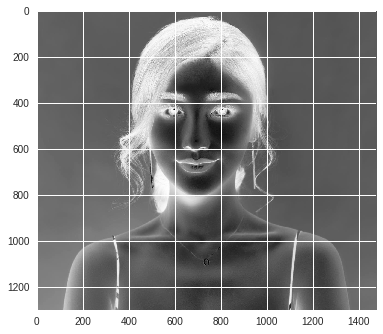

face:  420 222 555 555


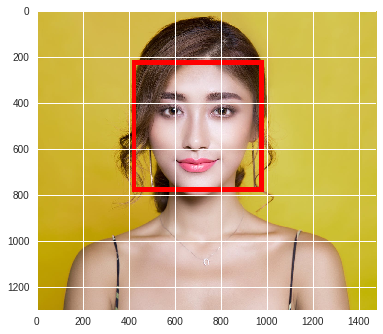

In [3]:
import matplotlib.pyplot as plt
import cv2

cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
plt.show()

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

if len(face_list) == 0:
  print("failed")
  quit()
  
for (x,y,w,h) in face_list:
  print("face: ", x, y, w, h)
  red = (0, 0, 255)
  cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
def mosaic(img, rect, size):
  
  # mosic area
  (x1, y1, x2, y2) = rect
  w = x2 - x1
  h = y2 - y1
  i_rect = img[y1:y2, x1:x2]
  
  #resize the shape
  i_small = cv2.resize(i_rect, (size, size))
  i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
  
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos
  return img2

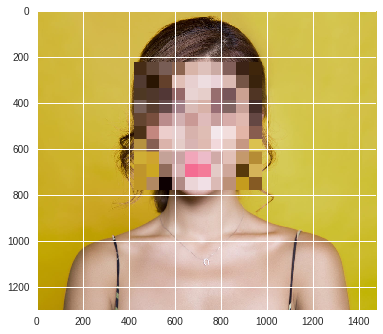

In [8]:
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()
  
for (x, y, w, h) in face_list:
  img = mosaic(img, (x, y, x+w, y+h), 10)
  
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()
  
  

In [0]:
# OpenCV2 cannot detect the side-angle faces

---0---
Face: 420 222 555 555
---10---
Face: 503 361 532 532
---20---
Face: 518 449 586 586
---30---
---40---
---50---
---60---
---70---
---80---


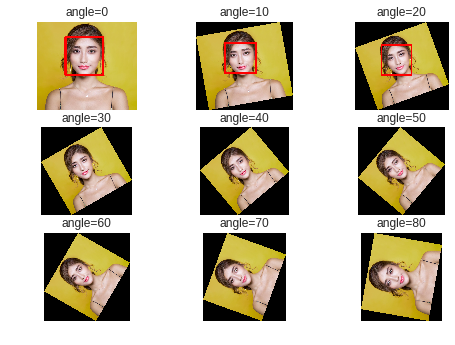

In [12]:
# roate test
from scipy import ndimage

img = cv2.imread("girl.jpg")

def face_detect(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
  
  for (x,y,w,h) in face_list:
    print("Face:", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)
    
for i in range(0, 9):
  ang = i * 10
  print("---" + str(ang) + "---")
  img_r = ndimage.rotate(img, ang)
  face_detect(img_r)
  plt.subplot(3, 3, i + 1)
  plt.axis("off")
  plt.title("angle=" + str(ang))
  plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
  
  
plt.show()